In [1]:
!pip install fastai
!pip install tqdm
!pip install imageio
!pip install h5py

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from fastai.vision import *
from pathlib import Path
from matplotlib import pyplot as plt
import imageio
import h5py
from tqdm import tqdm_notebook as tqdm

In [3]:
f = h5py.File('./data/nyu_depth_v2_labeled.mat', 'r+')

In [4]:
keys = []
f.visit(keys.append) # append all keys to list
images = f['images'][()]
labels = f['labels'][()]
names_ = f['names'][()]

In [5]:
def ref_to_string(r):
    s = ''
    for c in f[r][()]:
        s += chr(c[0])
    return s

In [6]:
names = [ref_to_string(names_[0][i]) for i in range(len(names_[0]))]
names

['book',
 'bottle',
 'cabinet',
 'ceiling',
 'chair',
 'cone',
 'counter',
 'dishwasher',
 'faucet',
 'fire extinguisher',
 'floor',
 'garbage bin',
 'microwave',
 'paper towel dispenser',
 'paper',
 'pot',
 'refridgerator',
 'stove burner',
 'table',
 'unknown',
 'wall',
 'bowl',
 'magnet',
 'sink',
 'air vent',
 'box',
 'door knob',
 'door',
 'scissor',
 'tape dispenser',
 'telephone cord',
 'telephone',
 'track light',
 'cork board',
 'cup',
 'desk',
 'laptop',
 'air duct',
 'basket',
 'camera',
 'pipe',
 'shelves',
 'stacked chairs',
 'styrofoam object',
 'whiteboard',
 'computer',
 'keyboard',
 'ladder',
 'monitor',
 'stand',
 'bar',
 'motion camera',
 'projector screen',
 'speaker',
 'bag',
 'clock',
 'green screen',
 'mantel',
 'window',
 'ball',
 'hole puncher',
 'light',
 'manilla envelope',
 'picture',
 'mail shelf',
 'printer',
 'stapler',
 'fax machine',
 'folder',
 'jar',
 'magazine',
 'ruler',
 'cable modem',
 'fan',
 'file',
 'hand sanitizer',
 'paper rack',
 'vase',
 'a

In [7]:
size = (480//3, 640//3)
size

(160, 213)

In [8]:
data = (SegmentationItemList.from_folder('seg/image')
       .split_none()
       .label_from_func(lambda x: str(x).replace('image', 'depth'), classes=names)
       .transform(get_transforms(), size=size, tfm_y=True)
       .databunch(bs=2))

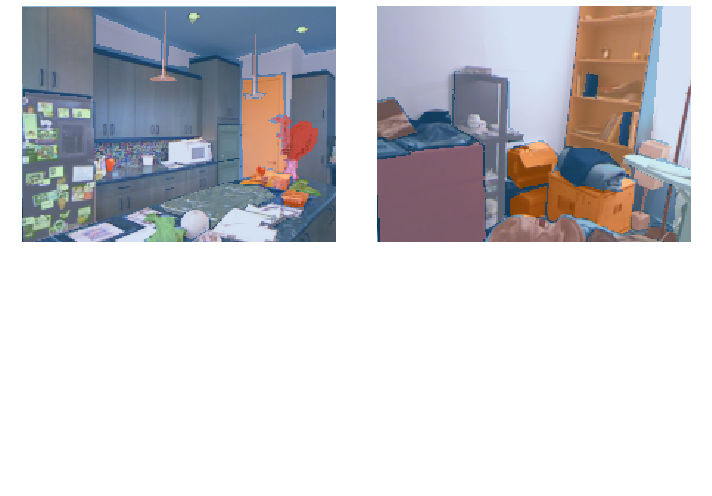

In [9]:
data.show_batch(2, figsize=(10,7))

In [10]:
learn = unet_learner(data, models.resnet34)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


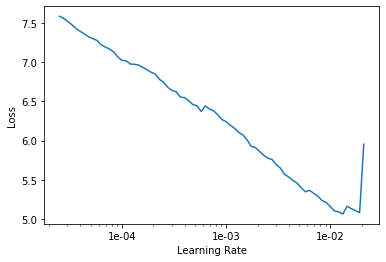

In [11]:
learn.lr_find(start_lr=1e-5, end_lr=1e-01, num_it=100)
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(6, slice(4e-04))

epoch,train_loss,valid_loss,time
0,2.611986,#na#,00:52
1,2.402691,#na#,00:52
2,2.222180,#na#,00:52
3,1.960838,#na#,00:52
4,1.905691,#na#,00:52
5,1.810921,#na#,00:52


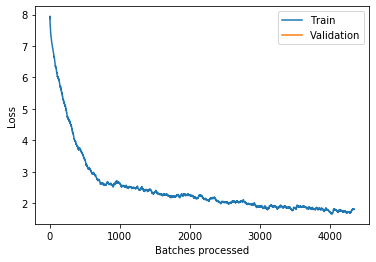

In [13]:
learn.recorder.plot_losses()

In [14]:
learn.save('stage-1')

In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


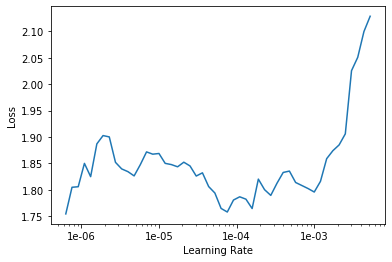

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(6, slice(1.8e-04))

epoch,train_loss,valid_loss,time
0,1.796621,#na#,00:57
1,1.843888,#na#,00:57
2,1.832950,#na#,00:57
3,1.664641,#na#,00:57
4,1.628709,#na#,00:57
5,1.554917,#na#,00:57


In [19]:
#!unzip testset.zip

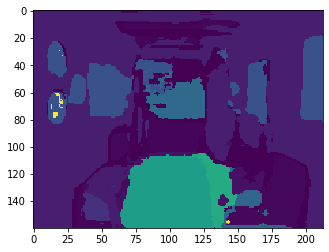

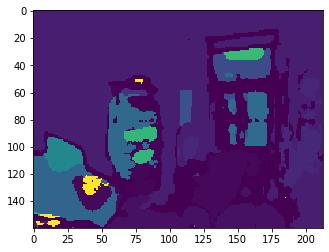

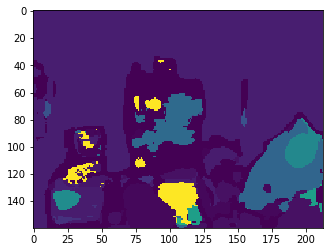

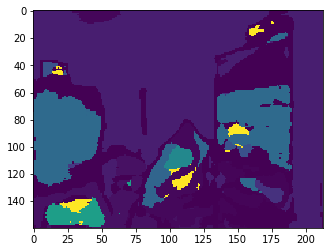

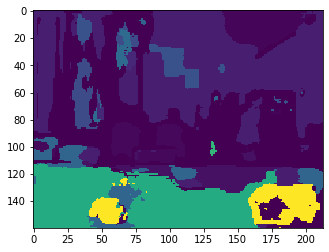

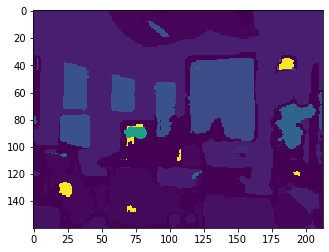

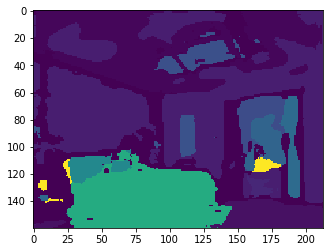

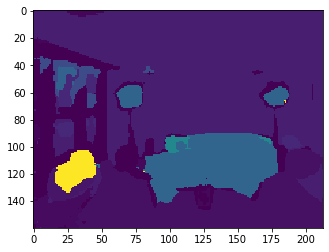

In [20]:
images = []
for i in range(1, 9):
    k = learn.predict(open_image(f'{i}.jpg'))[1]
    plt.imshow(k.squeeze())
    plt.show()